# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.

# Chapter 12: Trust regions

This notebook replicates the examples from the book, using the python package optimization_book. The numbering of the algorithms, tables and page refer to the book.

In [1]:
import numpy as np
import inspect
import matplotlib.pyplot as plt
import optimization_book.unconstrained as unc
import optimization_book.exceptions as excep

## Algorithm 12.1: Intersection with the trust region

The following example is not in the book

In [2]:
xhat = np.array([1, 1])
delta = 1.0
xc = np.array([1, 1.5])
xd = np.array([2.5, 5])

In [3]:
dc = xc - xhat
dd = xd - xhat
lbd = unc.trustRegionIntersection(dc, dd - dc, delta)
print(f'lambda={lbd}')

lambda=0.13677904350117376


We verify that $||d_C + \lambda (d_d - d_C)|| = \Delta$.

In [4]:
print(f'{np.linalg.norm(dc + lbd *(dd - dc))}')

0.9999999999999999


The point on the border is $x_C + \lambda (x_d - x_C)$.

In [5]:
xborder = xc + lbd * (xd - xc)
print(f'The point on the border is {xborder}')

The point on the border is [1.20516857 1.97872665]


The following figure illustrates the various points involved.

In [6]:
def myplot(the_ax, x, name, shift=0.05):
    """Insert a point with a label in the plot

    :param the_ax: handle of the plot
    :type the_ax: matplotlib.axes._subplots.AxesSubplot

    :param x: coordinates of the point
    :type x: np.array

    :param name: label for the point
    :type name: str

    :param shift: shift both in x and y for the label
    :type shift: float
    """
    the_ax.plot(x.item(0), x.item(1), marker='.')
    the_ax.annotate(
        name,
        xy=(x.item(0), x.item(1)),
        xytext=(x.item(0) + shift, x.item(1) + shift),
    )


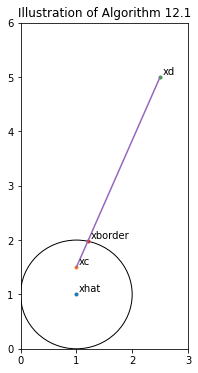

In [7]:
plt.rcParams["figure.figsize"] = [3, 6]
circle = plt.Circle((1, 1), 1.0, fill=False)
ax = plt.gca()
ax.set_xlim((0, 3))
ax.set_ylim((0, 6))
ax.add_artist(circle)

myplot(ax, xhat, 'xhat')
myplot(ax, xc, 'xc')
myplot(ax, xd, 'xd')
myplot(ax, xborder, 'xborder')

# Plot the line
plt.title('Illustration of Algorithm 12.1')
plt.plot([xc.item(0), xd.item(0)], [xc.item(1), xd.item(1)])

plt.show()


## Algorithm 12.2: Dogleg method

Example 12.3, p. 295

In [8]:
def ex1101(x):
    """Example function

    :param x: variable
    :type x: np.array[2]

    :return: value of the function, the gradient and the hessian
    :rtype: float, np.array[2], np.array[2*2]

    """
    f = 0.5 * x[0] * x[0] + 4.5 * x[1] * x[1]
    g = np.array([x[0], 9 * x[1]])
    h = np.array([[1, 0], [0, 9]])
    return f, g, h

In [9]:
def theFunctionToPlot(x,y):
    return(0.5 * x * x + 4.5 * y * y)

In [10]:
xhat = np.array([9, 1])
f, g, H = ex1101(xhat)

In [11]:
delta = 1
dstar1, type1 = unc.dogleg(g, H, delta)
x1 = xhat + dstar1
print(f'Delta: {delta} Type: {type1}\nx={x1}')

Delta: 1 Type: 1
x=[8.29289322 0.29289322]


In [12]:
delta = 4
dstar4, type4 = unc.dogleg(g, H, delta)
x4 = xhat + dstar4
print(f'Delta: {delta} Type: {type4}\nx={x4}')

Delta: 4 Type: 4
x=[5.06523072 0.28056223]


In [13]:
delta = 8
dstar8, type8 = unc.dogleg(g, H, delta)
x8 = xhat + dstar8
print(f'Delta: {delta} Type: {type8}\nx={x8}'.format(delta, type8, x8))

Delta: 8 Type: 3
x=[1.04893012 0.11654779]


Figure 12.2 (a) p. 296


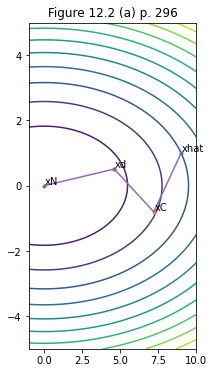

In [14]:
plt.title('Figure 12.2 (a) p. 296')
plt.rcParams["figure.figsize"] = [6, 6]


xlist = np.linspace(-1.0, 10.0, 1000)
ylist = np.linspace(-5.0, 5.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)

ax = plt.gca()
ax.set_xlim((-1, 10))
ax.set_ylim((-5, 5))
(dc, dn, dl) = unc.cauchyNewtonDogleg(g, H)
myplot(ax, xhat, 'xhat')
xc = xhat + dc
myplot(ax, xc, 'xC')
xn = xhat + dn
myplot(ax, xn, 'xN')
xd = xhat + dl
myplot(ax, xhat + dl, 'xd')
x_points = [xhat.item(0), xc.item(0), xd.item(0), xn.item(0)]
y_points = [xhat.item(1), xc.item(1), xd.item(1), xn.item(1)]
plt.plot(x_points, y_points)
plt.show()


Figure 12.2 (b) p. 296


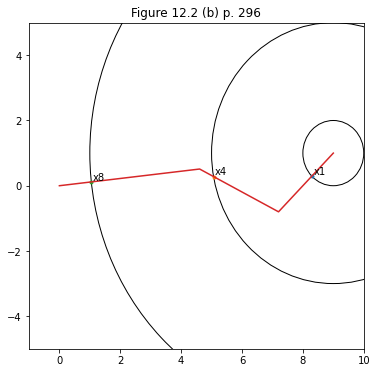

In [15]:
plt.title('Figure 12.2 (b) p. 296')
circle1 = plt.Circle((9, 1), 1.0, fill=False)
circle4 = plt.Circle((9, 1), 4.0, fill=False)
circle8 = plt.Circle((9, 1), 8.0, fill=False)
ax = plt.gca()
ax.set_xlim((-1, 10))
ax.set_ylim((-5, 5))
ax.add_artist(circle1)
ax.add_artist(circle4)
ax.add_artist(circle8)
myplot(ax, x1, 'x1')
myplot(ax, x4, 'x4')
myplot(ax, x8, 'x8')
x_points = [xhat.item(0), xc.item(0), xd.item(0), xn.item(0)]
y_points = [xhat.item(1), xc.item(1), xd.item(1), xn.item(1)]
plt.plot(x_points, y_points)
plt.show()


## Algorithm 12.3: Steihaug-Toint truncated conjugate gradients

 We illustrate the method on the same example as for Algorithm 12.2. This is not
 reported in the book. Note that there is no negative curvature
 here. Also, we have a large trust region ($\Delta=10$) to illustrate
 the case when the CG algorithm converges without hitting the trust
 region boundaries.


In [16]:
delta = 1
(step1,type1) = unc.truncatedConjugateGradient(g,H,delta)
x1 = xhat + step1
print(f'Delta: {delta} Type: {type1}\nx={x1}')

Delta: 1 Type: 2
x=[8.29289322 0.29289322]


In [17]:
delta = 4
(step4,type4) = unc.truncatedConjugateGradient(g,H,delta)
x4 = xhat + step4
print(f'Delta: {delta} Type: {type4}\nx={x4}')

Delta: 4 Type: 2
x=[ 5.33058286 -0.59228698]


In [18]:
delta = 8
(step8,type8) = unc.truncatedConjugateGradient(g,H,delta)
x8 = xhat + step8
print(f'Delta: {delta} Type: {type8}\nx={x8}')

Delta: 8 Type: 2
x=[ 1.07876863 -0.11986318]


In [19]:
delta = 10
(step10,type10) = unc.truncatedConjugateGradient(g,H,delta)
x10 = xhat + step10
print(f'Delta: {delta} Type: {type10}\nx={x10}')

Delta: 10 Type: 1
x=[0.00000000e+00 2.22044605e-16]


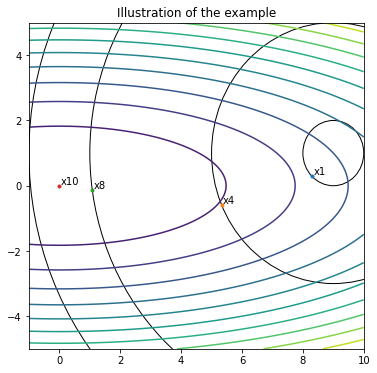

In [20]:
plt.title('Illustration of the example')
plt.rcParams["figure.figsize"] = [6,6]

xlist = np.linspace(-1.0,10.0,1000)
ylist = np.linspace(-5.0,5.0,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)


circle1 = plt.Circle((9,1),1.0,fill=False)
circle4 = plt.Circle((9,1),4.0,fill=False)
circle8 = plt.Circle((9,1),8.0,fill=False)
circle10 = plt.Circle((9,1),10.0,fill=False)
ax = plt.gca()
ax.set_xlim((-1, 10))
ax.set_ylim((-5, 5))
ax.add_artist(circle1)
ax.add_artist(circle4)
ax.add_artist(circle8)
ax.add_artist(circle10)
myplot(ax,x1,'x1')
myplot(ax,x4,'x4')
myplot(ax,x8,'x8')
myplot(ax,x10,'x10')
plt.show()


## Algorithm 12.4: Newton's method with trust region

In [21]:
def ex0508(x):
    """Example function

    :param x: variable
    :type x: np.array[2]

    :return: the value of the function, of the gradient abd of the hessian.
    :rtype: np.array[2], np.array[2], np.array[2x2]
    """

    f = 0.5 * x[0] * x[0] + x[0] * np.cos(x[1])
    g = np.array([x[0] + np.cos(x[1]), -x[0] * np.sin(x[1])])
    H = np.array([[1, -np.sin(x[1])], [-np.sin(x[1]), -x[0] * np.cos(x[1])]])
    return f, g, H

In [22]:
def theFunctionToPlot(x, y):
    """Funtion to be plotted

    :param x: first variable
    :type x: float
    :param y: second variable
    :type y: float

    :return: value of the function
    :rtype: float
    """

    return 0.5 * x * x + x * np.cos(y)

In [23]:
def tr_method(the_dl):
    """Describe the method used to solve the TR subproblem

    :param the_dl: if True, the Dogleg method is used to solve the trust
        region subproblem. If False, the truncated conjugate gradient
        method is used.
    :type the_dl: bool

    :return: name of the method
    :rtype: str
    """
    return 'Dogleg' if the_dl else 'Trunc. CG'


Retrieve the default values of the parameters for the algorithm

In [24]:
signature = inspect.signature(unc.newtonTrustRegion)
default_delta0 = signature.parameters['delta0'].default
default_dl = signature.parameters['dl'].default

In [25]:
delta0 = default_delta0
dl = default_dl
print(f'*** Initial radius of the TR: {delta0}, with {tr_method(dl)}')
x0 = np.array([1, 1])
sol, iters = unc.newtonTrustRegion(ex0508, x0)
print(f'Solution found: {sol}')


*** Initial radius of the TR: 10, with Dogleg
Solution found: [-1.00000025e+00 -5.40690858e-07]


Table 12.1, page 304'

In [26]:
print("k\txk\t\t\t\tf(xk)\t\t||Grad(xk)||\tDeltak\t\tRho\t\tStatus")
for k, the_iter in enumerate(iters):
    print(
        "{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{}\t{}".format(
            k,
            the_iter[0][0],
            the_iter[0][1],
            the_iter[1],
            the_iter[2],
            the_iter[3],
            the_iter[4],
            the_iter[5],
            the_iter[6],
        )
    )

k	xk				f(xk)		||Grad(xk)||	Deltak		Rho		Status
0	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00	+1.000000E+01	+0.000000E+00		
1	-2.338451E-01	+1.364192E+00	-2.062862E-02	+2.306654E-01	+2.000000E+01	+9.614446E-01	2	++
2	-1.395487E-01	+6.124147E-01	-1.044505E-01	+6.834378E-01	+4.000000E+01	+9.592373E-01	-2	++
3	-9.344969E-01	+5.184577E-01	-3.750473E-01	+4.677489E-01	+8.000000E+01	+9.892413E-01	-2	++
4	-1.245337E+00	-2.418279E-01	-4.336678E-01	+4.052853E-01	+8.000000E+01	+3.535767E-01	2	+ 
5	-1.019246E+00	-3.995314E-02	-4.990014E-01	+4.537823E-02	+1.600000E+02	+1.068830E+00	2	++
6	-1.000770E+00	-7.033741E-04	-4.999995E-01	+1.043234E-03	+3.200000E+02	+1.014141E+00	2	++
7	-1.000000E+00	-5.406909E-07	-5.000000E-01	+5.944321E-07	+6.400000E+02	+1.000350E+00	2	++


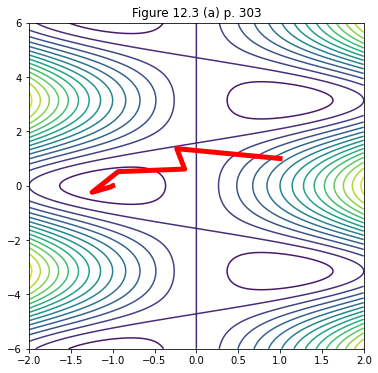

In [27]:
plt.title('Figure 12.3 (a) p. 303')
xlist = np.linspace(-2.0, 2.0, 1000)
ylist = np.linspace(-6.0, 6.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [the_iter[0][0] for the_iter in iters]
yiter = [the_iter[0][1] for the_iter in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()


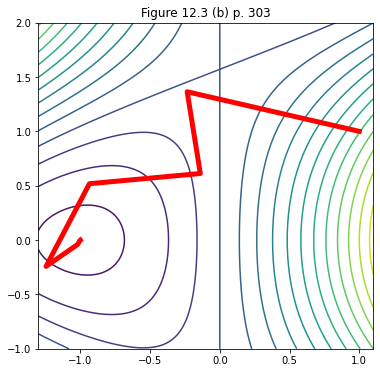

In [28]:
plt.title('Figure 12.3 (b) p. 303')
xlist = np.linspace(-1.3, 1.1, 1000)
ylist = np.linspace(-1, 2, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [the_iter[0][0] for the_iter in iters]
yiter = [the_iter[0][1] for the_iter in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()


In [29]:
delta0 = 1
dl = default_dl
print(f'*** Initial radius of the TR: {delta0}, with {tr_method(dl)}')
x0 = np.array([1, 1])
sol, iters = unc.newtonTrustRegion(ex0508, x0, delta0=delta0)
print(f'Solution found: {sol}')


*** Initial radius of the TR: 1, with Dogleg
Solution found: [-1.00000000e+00  7.23075033e-12]


Table 12.2, page 305

In [30]:
print("k\txk\t\t\t\tf(xk)\t\t||Grad(xk)||\tDeltak\t\tRho\t\tStatus")
for k, the_iter in enumerate(iters):
    print(
        "{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{}\t{}".format(
            k,
            the_iter[0][0],
            the_iter[0][1],
            the_iter[1],
            the_iter[2],
            the_iter[3],
            the_iter[4],
            the_iter[5],
            the_iter[6],
        )
    )

k	xk				f(xk)		||Grad(xk)||	Deltak		Rho		Status
0	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00	+1.000000E+00	+0.000000E+00		
1	+1.224174E-01	+1.479426E+00	+1.866284E-02	+2.459926E-01	+2.000000E+00	+9.475885E-01	1	++
2	-1.016285E-03	+1.570031E+00	-2.614639E-07	+1.046790E-03	+4.000000E+00	+9.975358E-01	2	++
3	-5.364085E-04	+1.568087E+00	-1.309492E-06	+2.238245E-03	+8.000000E+00	+1.000000E+00	-2	++
4	-5.089851E-03	+1.566963E+00	-6.558303E-06	+5.242594E-03	+1.600000E+01	+9.999983E-01	-2	++
5	-2.686573E-03	+1.557227E+00	-3.284477E-05	+1.120891E-02	+3.200000E+01	+1.000001E+00	-2	++
6	-2.548821E-02	+1.551598E+00	-1.644658E-04	+2.624866E-02	+6.400000E+01	+9.999570E-01	-2	++
7	-1.346383E-02	+1.502894E+00	-8.228867E-04	+5.602070E-02	+1.280000E+02	+1.000022E+00	-2	++
8	-1.272299E-01	+1.474795E+00	-4.101757E-03	+1.304729E-01	+2.560000E+02	+9.989287E-01	-2	++
9	-6.847501E-02	+1.237641E+00	-2.004875E-02	+2.665266E-01	+5.120000E+02	+1.000511E+00	-2	++
10	-5.884662E-01	+1.107498E+00	-8.9839

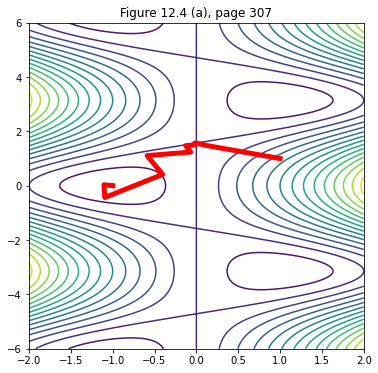

In [31]:
plt.title('Figure 12.4 (a), page 307')
xlist = np.linspace(-2.0, 2.0, 1000)
ylist = np.linspace(-6.0, 6.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [the_iter[0][0] for the_iter in iters]
yiter = [the_iter[0][1] for the_iter in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()


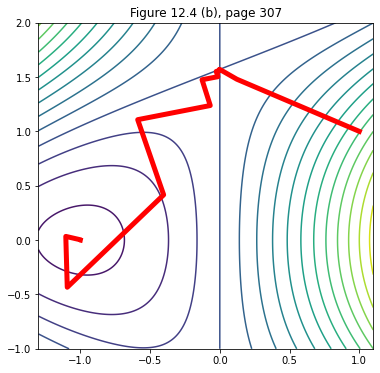

In [32]:
plt.title('Figure 12.4 (b), page 307')
xlist = np.linspace(-1.3, 1.1, 1000)
ylist = np.linspace(-1, 2, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()


In [33]:
delta0 = default_delta0
dl = False
print(f'*** Initial radius of the TR: {delta0}, with {tr_method(dl)}')
x0 = np.array([1, 1])
sol, iters = unc.newtonTrustRegion(ex0508, x0, dl=False)
print(f'Solution found: {sol}')


*** Initial radius of the TR: 10, with Trunc. CG
Solution found: [0.99999957 3.14159243]


Table 12.3, page 306

In [34]:
print("k\txk\t\t\t\tf(xk)\t\t||Grad(xk)||\tDeltak\t\tRho\t\tStatus")
for k, the_iter in enumerate(iters):
    print(
        "{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{:+E}\t{}\t{}".format(
            k,
            the_iter[0][0],
            the_iter[0][1],
            the_iter[1],
            the_iter[2],
            the_iter[3],
            the_iter[4],
            the_iter[5],
            the_iter[6],
        )
    )

k	xk				f(xk)		||Grad(xk)||	Deltak		Rho		Status
0	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00	+1.000000E+01	+0.000000E+00		
1	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00	+5.000000E+00	-7.519745E-02	3	- 
2	+1.000000E+00	+1.000000E+00	+1.040302E+00	+1.755165E+00	+2.500000E+00	-1.239910E-01	3	- 
3	+5.502300E-01	+3.459209E+00	-3.713324E-01	+4.351213E-01	+2.500000E+00	+4.196236E-01	3	+ 
4	+1.167903E+00	+2.761422E+00	-4.025175E-01	+4.950629E-01	+2.500000E+00	+1.700281E-01	1	+ 
5	+1.063652E+00	+3.125362E+00	-4.978341E-01	+6.607830E-02	+5.000000E+00	+1.043574E+00	1	++
6	+1.000116E+00	+3.140624E+00	-4.999995E-01	+9.752760E-04	+1.000000E+01	+1.003425E+00	1	++
7	+9.999996E-01	+3.141592E+00	-5.000000E-01	+4.819965E-07	+2.000000E+01	+1.000114E+00	1	++


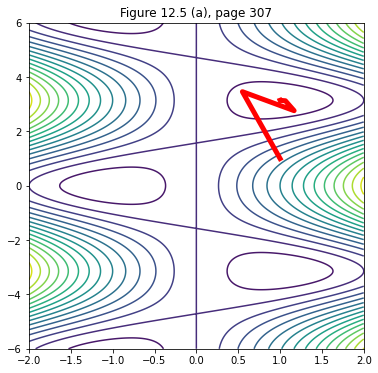

In [35]:
plt.title('Figure 12.5 (a), page 307')
xlist = np.linspace(-2.0, 2.0, 1000)
ylist = np.linspace(-6.0, 6.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [the_iter[0][0] for the_iter in iters]
yiter = [the_iter[0][1] for the_iter in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()


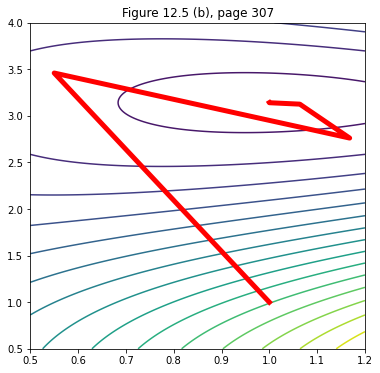

In [36]:
plt.title('Figure 12.5 (b), page 307')
xlist = np.linspace(0.5, 1.2, 1000)
ylist = np.linspace(0.5, 4, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()


## Section 12.3: Rosenbrock's problem

We test the algorithm on the Rosenbrock function. It is described in Section 11.6 of the book for two variables.  The implementation below involves $n$ variables: \\[f(x) = \sum_{i=1}^{n-1} f_i(x) = \sum_{i=1}^{n-1} 100 (x_{i+1}-x_i^2)^2 + (1-x_i)^2.\\]
The calculation of the derivatives is based on the partial derivatives of the functions $f_i$:
\\[
\begin{array}{rcl}
\partial f_i/\partial x_i&=& -400 x_i (x_{i+1}-x_i^2) - 2(1-x_i), \\\\
\partial f_i/\partial x_{i+1}&=& 200 (x_{i+1}-x_i^2), \\\\
\partial^2 f_i/\partial x^2_i  &=& -400 x_{i+1}+ 1200 x_i^2 + 2, \\\\
\partial^2 f_i/\partial x_i \partial x_{i+1}  &=& -400 x_i^2, \\\\
\partial^2 f_i/\partial x^2_{i+1}  &=& 200. 
\end{array}
\\]




In [37]:
def exRosenbrock(x, derivatives=True):
    """Implementation of the Rosenbrock function

    :param x: vector of variables
    :type x: np.array(n)

    :param derivatives: if True, the gradient and hessian are calculated
    :type derivatives: bool

    :return: value of the function, the gradient (or None) and the
             hessian (or None)
    :rtype: float, np.array(n), np.array(n*n)

    """
    n = len(x)
    f = sum(
        100.0 * (x[i + 1] - x[i] ** 2) ** 2 + (1.0 - x[i]) ** 2
        for i in range(n - 1)
    )
    if not derivatives:
        return f, None, None
    g = np.zeros(n)
    for i in range(n - 1):
        g[i] = g[i] - 400 * x[i] * (x[i + 1] - x[i] ** 2) - 2 * (1 - x[i])
        g[i + 1] = g[i + 1] + 200 * (x[i + 1] - x[i] ** 2)
    H = np.zeros((n, n))
    for i in range(n - 1):
        H[[i], [i]] = H[[i], [i]] - 400 * x[i + 1] + 1200 * x[i] ** 2 + 2
        H[[i + 1], [i]] = H[[i + 1], [i]] - 400 * x[i]
        H[[i], [i + 1]] = H[[i], [i + 1]] - 400 * x[i]
        H[[i + 1], [i + 1]] = H[[i + 1], [i + 1]] + 200
    return f, g, H



We use the function exRosenbrock defined above. We redefine it for the sake of plotting. 

In [38]:
def theFunctionToPlot(x, y):
    X = np.array([x, y])
    f, _, _ = exRosenbrock(X, derivatives=False)
    return f

We define the following functon for plotting.

In [39]:
def plotRosenbrockIters(title, iters, xmin, xmax, ymin, ymax):
    """Plots iterations on the contours of the function

    :param title: plot title
    :type title: str

    :param xmin: lower bound for the x axis
    :type xmin: float

    :param xmax: upper bound for the x axis
    :type xmax: float

    :param ymin: lower bound for the y axis
    :type ymin: float

    :param ymax: upper bound for the y axis
    :type ymax: float

    :param iters: list of information about each iteration. The
        iterate is stored at position 0.
    :type iters: list(tuple)

    """
    xlist = np.linspace(xmin, xmax, 1000)
    ylist = np.linspace(ymin, ymax, 1000)
    X, Y = np.meshgrid(xlist, ylist)
    Z = theFunctionToPlot(X, Y)
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.contour(X, Y, Z, 20)
    xiter = [iters[k][0][0] for k in range(len(iters))]
    yiter = [iters[k][0][1] for k in range(len(iters))]
    plt.title(title)
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.plot(xiter, yiter, linewidth=1, color='r', marker="o", mfc='blue')
    plt.plot(1, 1, marker='*')
    plt.show()



Solving Rosenbrock with Newton and trust region.

In [40]:
x0 = np.array([-1.5,1.5])
sol, iters = unc.newtonTrustRegion(exRosenbrock, x0, eps=1.0e-7)
print(f'Newton and trust region: solution: {sol}')
print(f'Newton and trust region: number of iterations: {len(iters)}')

Newton and trust region: solution: [1. 1.]
Newton and trust region: number of iterations: 30


Figure 12.6 (a): Newton and trust region

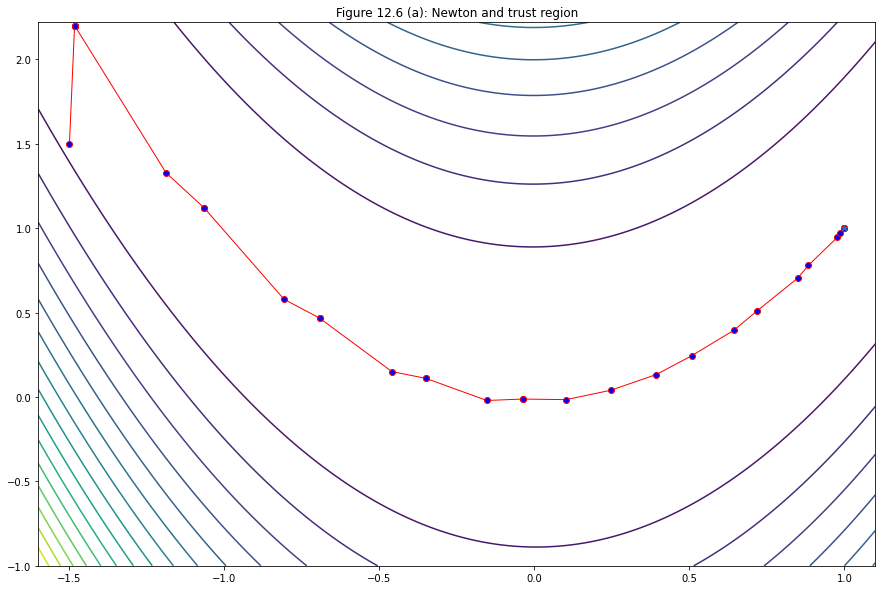

In [41]:
plotRosenbrockIters(
    'Figure 12.6 (a): Newton and trust region', iters, -1.6, 1.1, -1, 2.22
)


Figure 12.6 (b): Newton and trust region

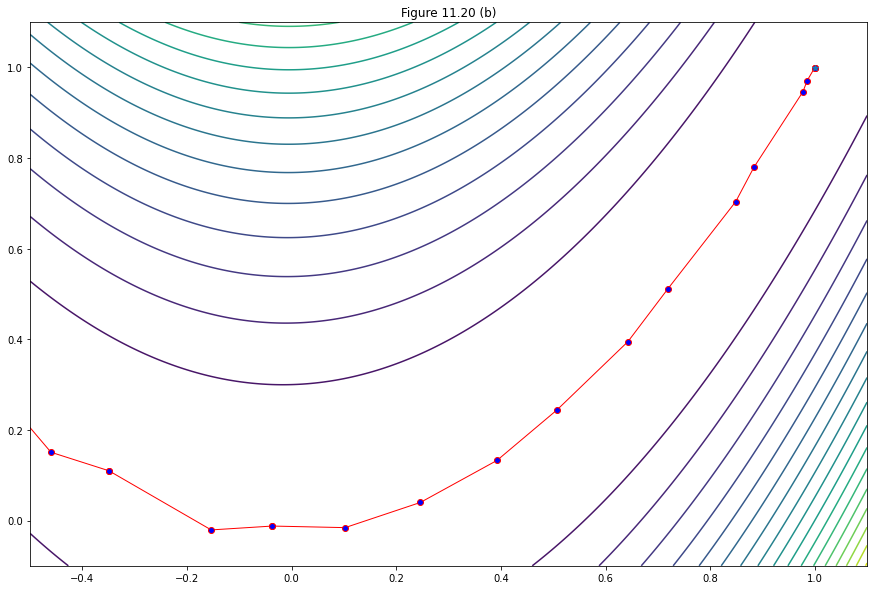

In [42]:
plotRosenbrockIters('Figure 11.20 (b)', iters, -0.5, 1.1, -0.1, 1.1)